In [21]:
import seaborn as sns
import numpy as np

In [22]:
### Le fichier des stats : 
titanic = sns.load_dataset('titanic')
titanic['age'] = np.round(titanic['age'] )

<AxesSubplot:xlabel='sex', ylabel='age'>

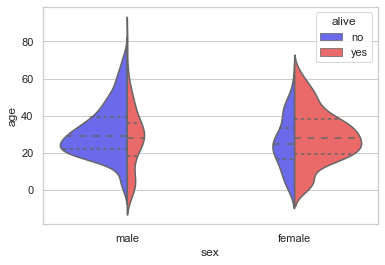

In [23]:
sns.set_theme(style="whitegrid")


sns.violinplot(y="age", hue="alive", x = 'sex',
              data=titanic,
              scale='count',
               split=True,
              palette='seismic',
              inner='quartile')


In [43]:
import pandas as pd


tabletitanic = pd.pivot_table(titanic, values='survived', index=['age','sex'], columns='alive',
                    aggfunc=np.ma.count,fill_value=0) 

 
def CalculPxMethode(df=tabletitanic):
    df['Lx'] = df['no']+df['yes']
    df['Lx1'] = df['yes'] 
        # Selon la definition de Px
    df['Px'] = df['Lx1']/df['Lx'] 
    df['Qx'] = (1-df['Lx1']/df['Lx']) 
#CalculPxMethode3(df=tabletitanic)
CalculPxMethode(df=tabletitanic)
display(tabletitanic)
#df.expanding(..., method='table') pour travailler avec plusieurs variables

alive        no  yes  Lx  Lx1        Px        Qx
age  sex                                         
0.0  male     0    1   1    1  1.000000  0.000000
1.0  female   0    4   4    4  1.000000  0.000000
     male     2    7   9    7  0.777778  0.222222
2.0  female   4    2   6    2  0.333333  0.666667
     male     3    1   4    1  0.250000  0.750000
...          ..  ...  ..  ...       ...       ...
66.0 male     1    0   1    0  0.000000  1.000000
70.0 male     3    0   3    0  0.000000  1.000000
71.0 male     2    0   2    0  0.000000  1.000000
74.0 male     1    0   1    0  0.000000  1.000000
80.0 male     0    1   1    1  1.000000  0.000000

[126 rows x 6 columns]

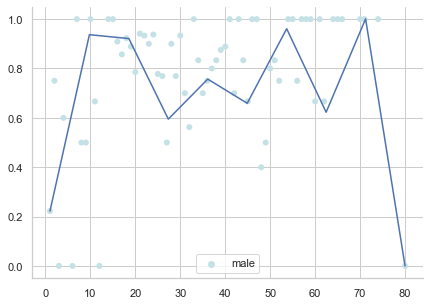

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

tabletitanicHomme=tabletitanic[(tabletitanic['sex']=='male')] 
Table = tabletitanicHomme.loc[1:].to_numpy() 


f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
x = Table[:,1] # Age
hue = Table[:,2] # Sex
y = Table[:,8]  # Qx

sns.scatterplot(x=x, y=y,
                hue=hue,  
                palette="ch:r=-.2,d=.3_r" ,
                sizes=(1, 8), linewidth=0,
                  ax=ax)
 
  
xnew = np.linspace(x.min(), x.max(), 10)
  
gfg = make_interp_spline(x, y, k=2)
  
y_new = gfg(xnew)
  
plt.plot(xnew, y_new)
  
plt.show()